In [ ]:
# Deep Learning Model for Image Classification using TensorFlow (MNIST)

In [1]:
# STEP 1: INSTALL AND IMPORT LIBRARIES
!pip install -q tensorflow matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# STEP 2: LOAD THE MNIST DATASET
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Reshape for CNN input
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

In [6]:
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [7]:
# STEP 3: BUILD THE CNN MODEL
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# STEP 4: TRAIN THE MODEL
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8996 - loss: 0.3213 - val_accuracy: 0.9842 - val_loss: 0.0489
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 28ms/step - accuracy: 0.9858 - loss: 0.0475 - val_accuracy: 0.9894 - val_loss: 0.0332
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9908 - val_loss: 0.0274
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9918 - val_loss: 0.0245
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9939 - loss: 0.0183 - val_accuracy: 0.9912 - val_loss: 0.0249


In [10]:
# Plot training history
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

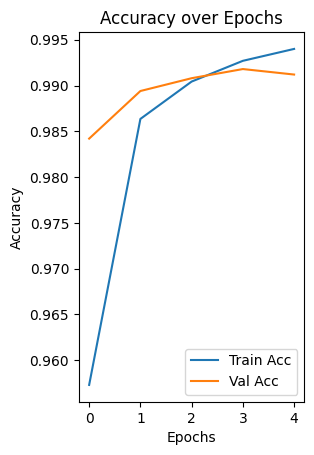

In [11]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

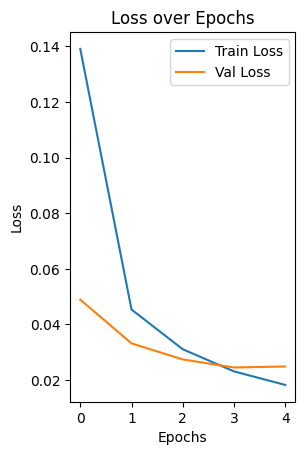

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [13]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [14]:
# STEP 6: PREDICT AND SHOW SAMPLE RESULTS
import numpy as np

In [15]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


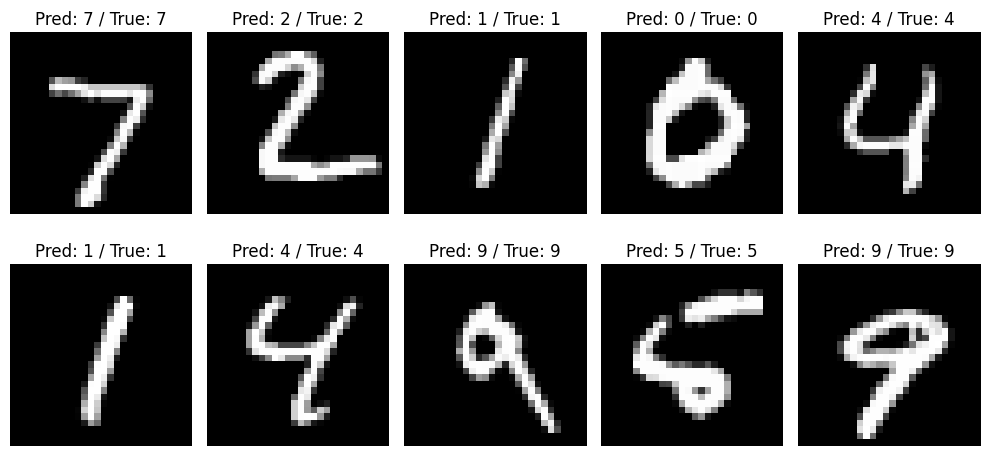

In [16]:
# Show sample predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])} / True: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
# Save the model
model.save("mnist_cnn_model.h5")


In [18]:
from google.colab import files
files.download("mnist_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
from PIL import Image

# Load and preprocess your image
img = Image.open(next(iter(uploaded))).convert('L').resize((28, 28))
img_array = np.array(img)
img_array = 255 - img_array  # invert if white bg
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Predict
pred = model.predict(img_array)
print(f"Predicted Digit: {np.argmax(pred)}")


KeyboardInterrupt: 